# Credit Card Fraud Detection Capstone Project

## Problem Statement: 
Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day.
Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.    
 


**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.**

## Data Understanding :

The data set that you will be working on during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.

As you saw, the data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

The distribution plots of the variables were Gaussian, which might indicate the effects of transformations that had already occurred on the data set. 

In [1]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Displaying 500 columns
pd.set_option('display.max_columns', 500)

In [5]:
#Shape of the Data set
df.shape

(284807, 31)

In [6]:
# Data set Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Description of the Data set
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Handling Missing Values** 

In [8]:
# Checking the total number of null values
df.isnull().sum().sum()

0

We can see there are no Null Values

**Checking the distribution of Classes**

In [9]:
# Class Distribution
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# Percentage distribution of Fradulent Vs Non Fradulent
df['Class'].value_counts(normalize = True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

0 - **Non-Fradulent**  
1 - **Fraudulent**

***Interpretation***:  
**Class Imbalance** Problem exists for the Data set 

**Graphical** **Visualisation**

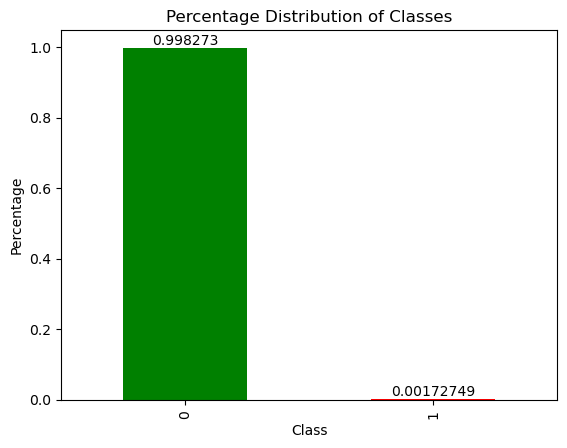

In [11]:
# Bar plot
ax = df['Class'].value_counts(normalize = True).plot.bar(color = ['g', 'r'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Percentage Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

**Outliers Treatment**

- For this specific dataset, we are not treating any outliers. 
- since the data has previously been PCA transformed across all columns, with the assumption that outlier values were taken into account.

**Distribution of classes with time**

In [12]:
# Fraudulent dataframes
data_fraud = df[df['Class'] == 1]

# Non Fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

In [13]:
# Data Frames Validation

print(data_fraud.shape)
print(data_non_fraud.shape)

(492, 31)
(284315, 31)


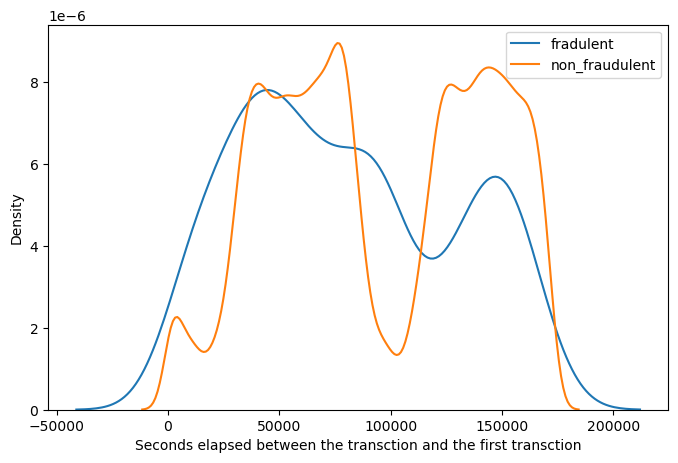

In [14]:
# Distribution plot

plt.figure(figsize=(8, 5))
ax = sns.distplot(data_fraud['Time'], label='fradulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non_fraudulent', hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend(loc='best')
plt.show()

**Interpretation**  
- Regarding Time, we don't notice any distinct pattern between fraudulent and non-fraudulent transactions.
- So, we can eliminate the Time column.

In [15]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

In [16]:
# Data Frame Validation
df.shape

(284807, 30)

**Distribution of classes with Amount**

In [17]:
df[df.Class==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

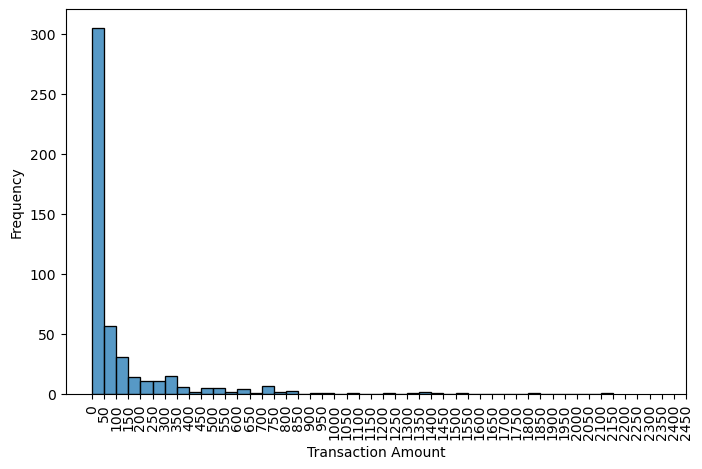

In [18]:
# Distribution of Fraudulent data

plt.figure(figsize=(8, 5))
sns.histplot(data_fraud['Amount'], binwidth=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(range(0, 2500, 50), rotation=90)
plt.show()

**Interpretation:**

- Most of the Fraudulent transactions are in the range of 0-50 dollars
- Highest Fraud transaction was at between 2100-2150 dollars

**Train-Test Split**

In [19]:
# Test-Train Split
from sklearn.model_selection import train_test_split

In [20]:
# Placing Features in X
X = df.drop(['Class'], axis=1)

In [21]:
# Target Variable
y = df['Class']

In [22]:
# Validating X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [23]:
# Validating 'y'
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, stratify=y, random_state=42)

**Feature Scaling**

- Only the **Amount** column needs to be scaled because the PCA transformation has already scaled the other columns.

In [25]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [26]:
# Instantiating the Scaler
scaler = StandardScaler()

In [27]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [28]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,-0.222719,0.377643,0.386075,-0.650025,0.418040,-1.009056,0.225934,-0.738861,-0.068285,0.329703,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,-0.321082
214082,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,0.517022,0.489890,0.247935,-1.055373,1.242616,-0.433066,-0.136620,-0.720880,0.328234,-0.016297,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,0.243475
106005,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,0.086419,-0.376936,0.191335,1.046362,0.420874,0.805190,-1.316514,0.059491,0.915477,-1.087435,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,4.797594
58619,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,0.128383,0.009338,-0.341516,0.004210,-0.287098,1.385535,0.398955,-0.299877,0.403600,0.929925,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,-0.331514
191638,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,-0.283699,-0.331548,-0.180028,-0.254641,-0.388456,0.414223,0.048084,-0.710405,0.007241,-0.458141,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,-0.331514


**Scaling the Test set**

In [29]:
# Test set transformation
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
186882,-2.537331,1.890864,-0.840555,-1.102759,-2.105725,0.367811,-2.737844,-3.543314,-0.483147,0.112724,-1.612586,0.635855,0.406871,0.854371,0.505753,-0.947788,0.557331,1.546638,-0.789047,-1.959611,4.328165,-2.167329,1.022567,-0.241143,-1.094885,-0.475427,-0.177157,-0.082691,-0.201469
165754,-0.250839,1.104108,0.206089,0.417324,1.204079,-0.350694,1.369769,-0.133535,-0.957100,-0.261170,0.244248,0.418555,-0.475202,0.658159,-1.274781,-0.621563,-0.397771,0.178173,0.604366,-0.128120,0.133048,0.499501,-0.392572,-0.393364,0.233354,-0.490717,0.143897,0.136810,-0.312626
235285,0.568980,-2.520416,-1.114138,1.670652,-1.128945,0.398822,0.190403,0.161493,0.840595,0.099172,0.520022,-0.251312,-2.279548,0.893064,0.503413,0.875849,-0.824311,0.837538,-0.555301,1.039287,0.318037,-0.760732,-0.181332,0.595866,-0.760920,-1.048927,-0.096970,0.088686,2.416826
101271,1.328892,0.226908,-0.308968,0.381772,0.238490,-0.282946,0.029460,-0.079962,0.227173,-0.267319,-1.431070,-0.578758,-0.188827,-0.236694,1.270649,0.919639,-0.475997,0.241545,0.329519,-0.050933,-0.379270,-1.148959,-0.047403,-1.074464,0.375683,0.182045,-0.031732,0.017501,-0.290023
5832,1.124863,-0.165691,1.337053,1.030033,-0.891116,0.202926,-0.825094,0.163280,2.301808,-0.641129,0.334222,-2.299609,1.066235,1.177166,-0.218823,-0.129612,0.870825,-0.336065,-0.600662,-0.196966,-0.216512,-0.195607,0.072785,0.045625,0.135192,0.308617,0.001142,0.017673,-0.281092


**Skewness Observation**

In [30]:
# listing all the Columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

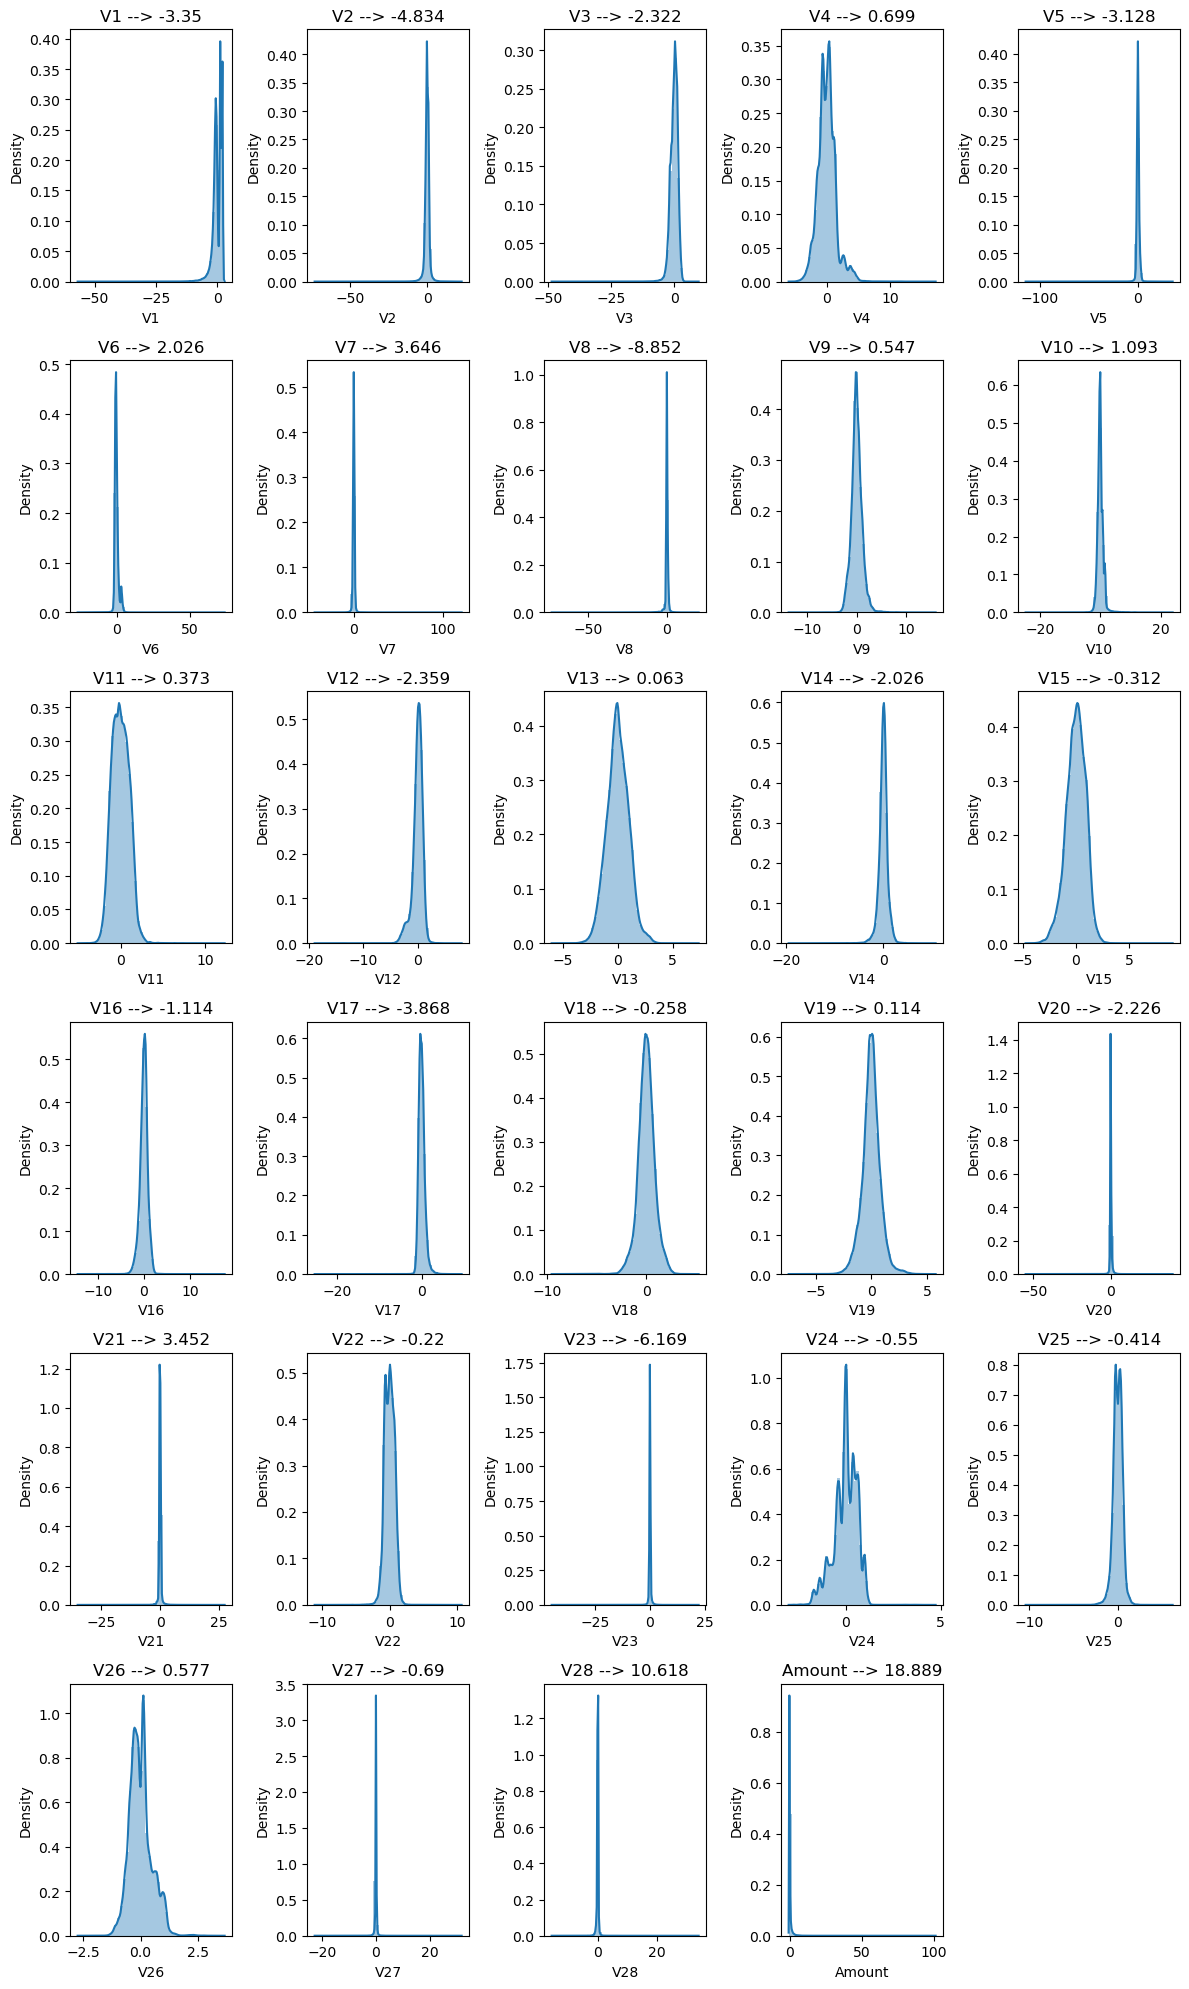

In [31]:
# Plotting the distribution of the variables (skewness) of all the columns
# Distplot
k=0 
plt.figure(figsize=(12, 20))
for col in cols:
  k=k+1
  plt.subplot(6, 5, k)
  sns.distplot(X_train[col])
  plt.tight_layout()
  plt.title(col + ' --> ' + str(round(X_train[col].skew(), 3)))

**Observation**:
- There are several factors that are significantly skewed, as can be shown. 
- As a result, we'll be attempting to reduce the skewness and convert them to a normal distribution.

**Mitigating Skewness with PowerTransformer**

In [32]:
# PowerTransformer
from sklearn.preprocessing import PowerTransformer 

#Instantiate the powertransformer(yeo-johnson)
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PowerTransformer on Training data
X_train[cols] = pt.fit_transform(X_train)

In [33]:
# Test set Transformation
X_test = pt.transform(X_test)

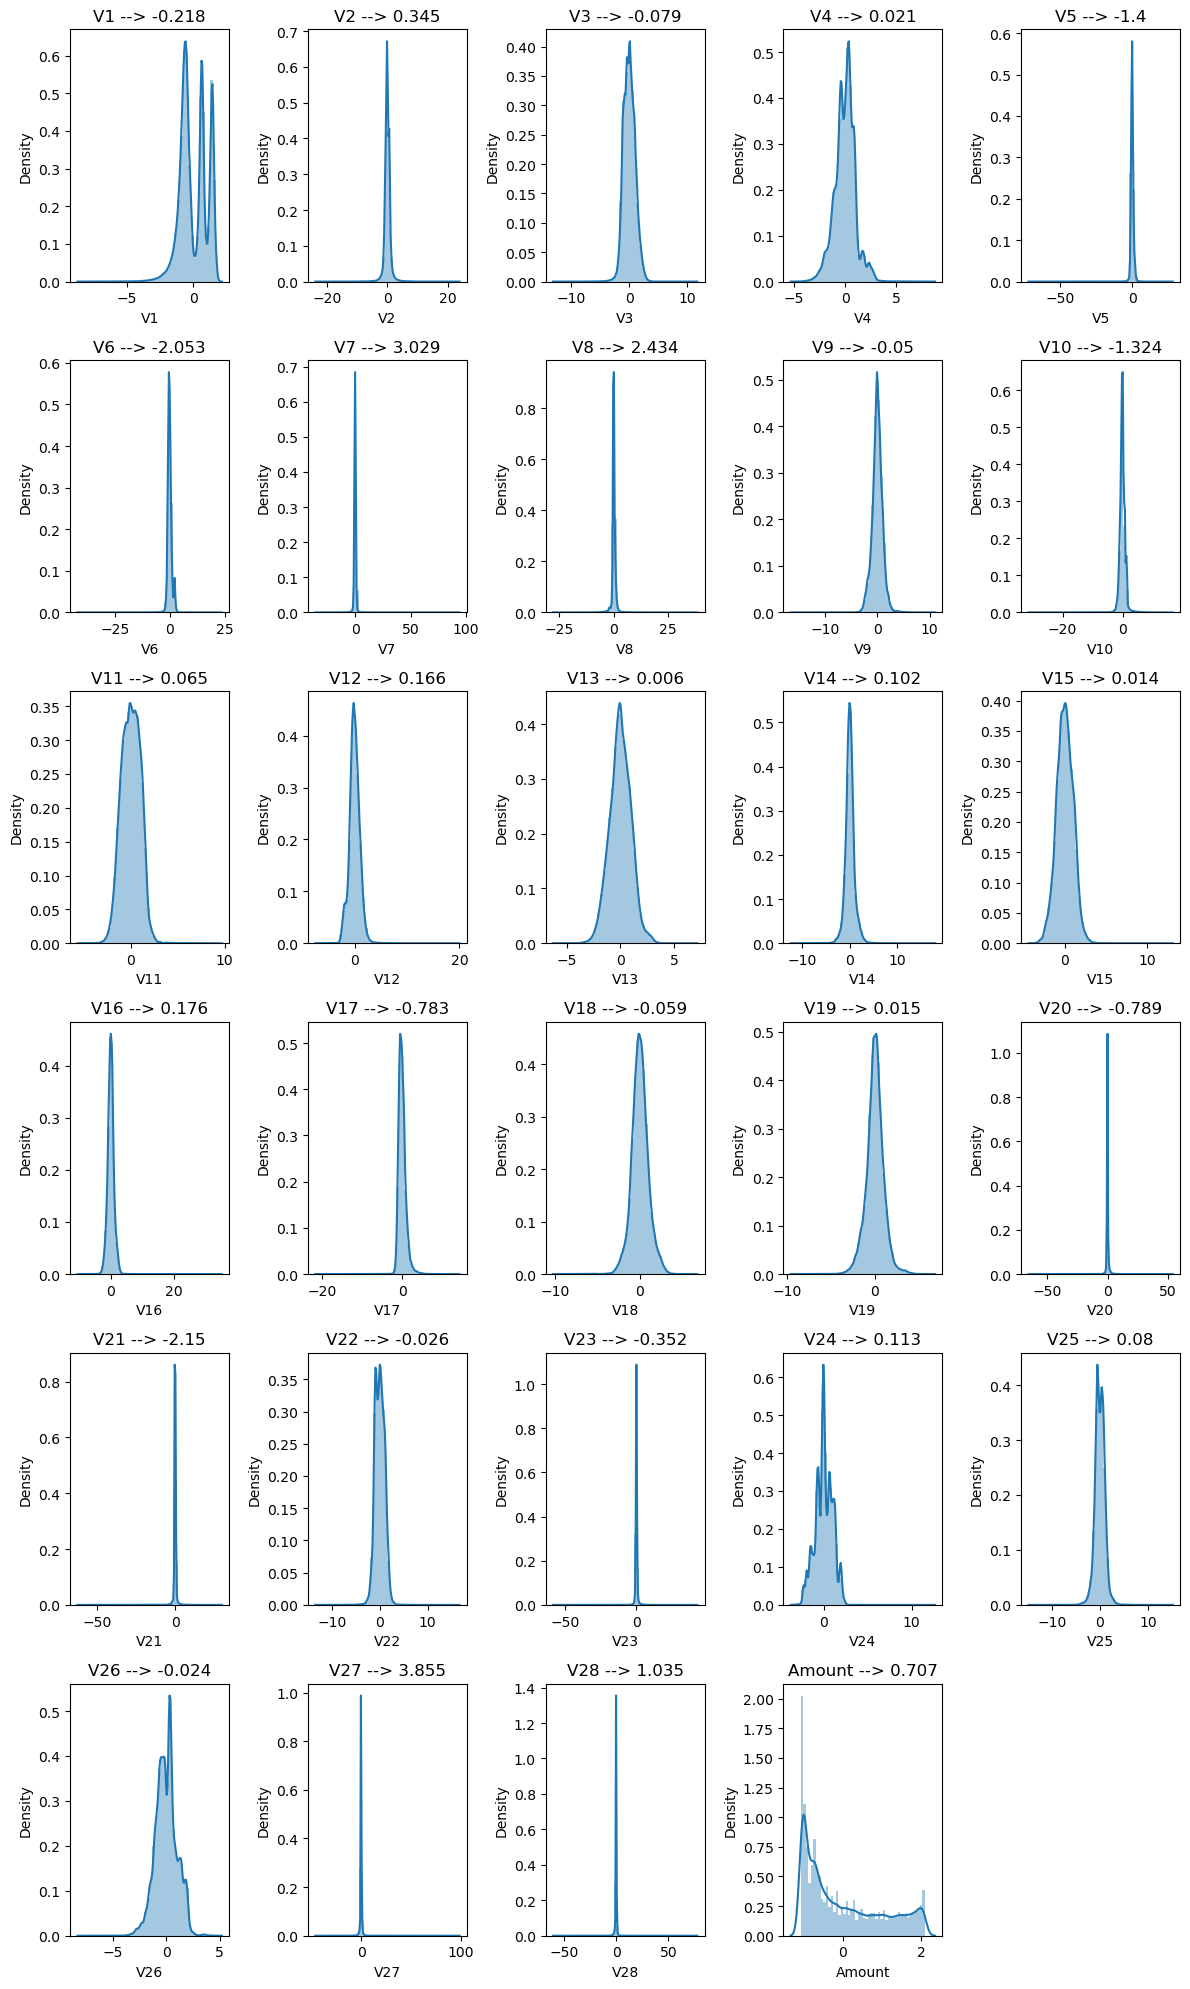

In [34]:
# Now Validating the distribution of the variables (skewness) of all the columns
# Distplot
k=0 
plt.figure(figsize=(12, 20))
for col in cols:
  k=k+1
  plt.subplot(6, 5, k)
  sns.distplot(X_train[col])
  plt.tight_layout()
  plt.title(col + ' --> ' + str(round(X_train[col].skew(), 3)))

- Now that the variables appear to be **Normally Distributed** following Transformation.

## **Model building on Imbalanced Data**

**Evaluation Metric selection for Heavily Imbalanced data**:

**Points to be discussed**:
- Given that just 0.17% of transactions are fraudulent and that the data is highly skewed, accuracy should not be used as a metric to assess the model.
- Because it will produce an accuracy of more than 99% if the model consistently forecasts the same class (1 or 0) for all the data points.
- As a result, in order to evaluate the model fairly, we must measure the ROC-AUC score. 
- In other words, when working with imbalanced datasets, accuracy alone might not be a reliable performance indicator. As it does not accurately reflect the model's capacity to identify the minority class, it may be deceptive.  
- In these situations, the ROC curve is used to evaluate the model's performance and determine its strength.

**Why were Random Forest and SVM not explored for model construction in some cases?**  
- The dataset has 284,807 data points, and oversampling would result in an even higher number of data points. 
- SVM is not very effective when there are a lot of data points because the transformation requires a lot of computer power and resources.
- It requires a lot of computing resources and a lot of time to do cross validation with K-Fold for hyperparameter tuning. 
- SVM was therefore not tested because to a lack of time and necessary resources.


**Why wasn't KNN used to build the model?** 
- KNN doesn't use memory effectively. As the quantity of datapoints rises, it becomes extremely sluggish since the model must store every single data point.
-  It requires a lot of computing since, for each data point, the algorithm must determine the distance between each data point and locate its closest neighbors.

**Logistic regression**

In [35]:
# logistic regression module
from sklearn.linear_model import LogisticRegression

In [36]:
# importing evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

**Hyperparameter C tuning**: 
- Regularization is a method for keeping machine learning models from overfitting. It discourages complex models from fitting the training data too closely by adding a penalty term to the loss function.
- Stronger regularization is correlated with a smaller value of C, which results in a more confined model with easier decision boundaries. 
- If set too low, it could result in underfitting but can also aid avoid overfitting. However, a greater value of C weakens regularization, allowing the model to better fit the training set of data. 
- This might enhance performance on the practice set, but it might also raise the danger of overfitting.

In [37]:
# libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [38]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, random_state=4, shuffle=True)
# Specifying params
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
# Indicating score as recall since we want to achieve a better sensitivity than accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(), 
                        param_grid = params, 
                        scoring ='roc_auc', 
                        cv=folds, 
                        verbose=1, 
                        return_train_score=True)

In [39]:
# Fitting the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [40]:
# Results of GridSearchCV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.690376,0.104268,0.029325,0.003498,0.01,{'C': 0.01},0.994970,0.982690,0.970501,0.993970,0.976481,0.983722,0.009590,1,0.984436,0.988452,0.990826,0.985024,0.986544,0.987057,0.002342
1,1.088551,0.018678,0.034692,0.006307,0.1,{'C': 0.1},0.992936,0.979420,0.970119,0.995823,0.979909,0.983642,0.009480,2,0.985116,0.988245,0.990107,0.984366,0.985881,0.986743,0.002127
2,1.168093,0.103817,0.034364,0.011383,1,{'C': 1},0.992249,0.978358,0.968759,0.996223,0.979867,0.983091,0.009945,3,0.984815,0.987668,0.989583,0.983875,0.985321,0.986252,0.002082
3,1.173370,0.097370,0.031555,0.000098,10,{'C': 10},0.992175,0.978227,0.968587,0.996268,0.979825,0.983016,0.010008,4,0.984769,0.987581,0.989507,0.983813,0.985249,0.986184,0.002073
4,1.138313,0.060132,0.037706,0.007693,100,{'C': 100},0.992166,0.978215,0.968565,0.996272,0.979825,0.983009,0.010015,5,0.984765,0.987572,0.989498,0.983806,0.985241,0.986176,0.002072
5,1.139696,0.050409,0.031510,0.010988,1000,{'C': 1000},0.992165,0.978214,0.968562,0.996272,0.979823,0.983007,0.010016,6,0.984765,0.987571,0.989497,0.983804,0.985240,0.986176,0.002072


In [42]:
cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_fit_time', 'mean_score_time', 'mean_train_score']]

,params,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,mean_train_score
0,{'C': 0.01},0.983722,0.009590,1,0.690376,0.029325,0.987057
1,{'C': 0.1},0.983642,0.009480,2,1.088551,0.034692,0.986743
2,{'C': 1},0.983091,0.009945,3,1.168093,0.034364,0.986252
3,{'C': 10},0.983016,0.010008,4,1.173370,0.031555,0.986184
4,{'C': 100},0.983009,0.010015,5,1.138313,0.037706,0.986176
5,{'C': 1000},0.983007,0.010016,6,1.139696,0.031510,0.986176


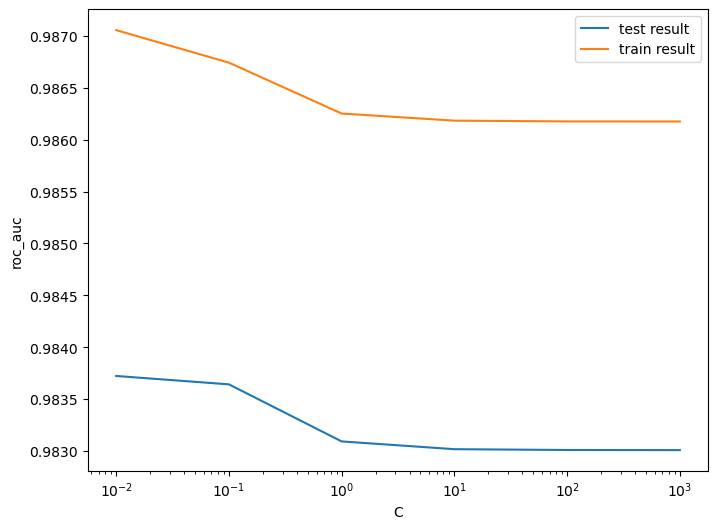

In [41]:
# Plot of C versus Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper right')
plt.xscale('log')

In [43]:
# Best score
best_score = model_cv.best_score_
best_score

0.9837222270065269

In [44]:
# Best params
best_params = model_cv.best_params_['C']
best_params

0.01

In [45]:
print(f"Best Score: {best_score}")
print(f"Best Params: {best_params}")

Best Score: 0.9837222270065269
Best Params: 0.01


**Logistic Regression with Optimal C**

In [46]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [47]:
# Fit the model on the Train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

**Train set Prediction**

In [48]:
# Initialize
y_train_pred = logistic_imb_model.predict(X_train)

In [49]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

array([[198998,     22],
       [   131,    213]], dtype=int64)

In [50]:
TN = confusion_matrix[0,0] # True negative
FP = confusion_matrix[0,1] # False positive
FN = confusion_matrix[1,0] # False negative
TP = confusion_matrix[1,1] # True positive

In [51]:
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity:", TP / float(TP+FN))
# Specificity
print("Specificity:", TN / float(TN+FP))
# F1 score
print("F1-score:", f1_score(y_train, y_train_pred))

Accuracy: 0.9992325595393351
Sensitivity: 0.6191860465116279
Specificity: 0.9998894583458949
F1-score: 0.7357512953367875


In [52]:
# Classification_Report
print(classification_report(y_train, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



**ROC on the Train set**

In [53]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [54]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]
y_train_pred_proba

array([0.00014499, 0.00038312, 0.00057989, ..., 0.00048833, 0.00045125,
       0.00026289])

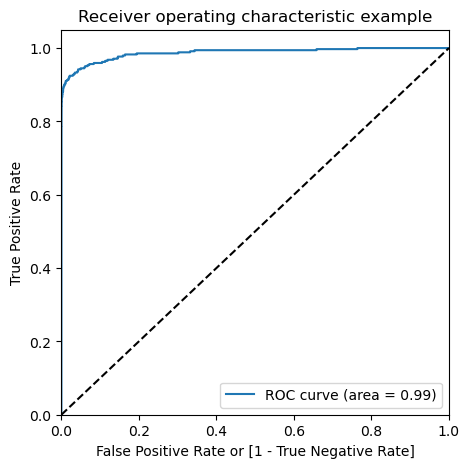

In [55]:
# ROC curve Plot
draw_roc(y_train, y_train_pred_proba)

- On the train set, we had extremely good ROC 0.99.

**Test set Prediction**

In [56]:
# Prediction on the Test set
y_test_pred = logistic_imb_model.predict(X_test)

In [57]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85281    14]
 [   61    87]]


In [58]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [59]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991222218320986
Sensitivity:- 0.5878378378378378
Specificity:- 0.9998358637669266
F1-Score:- 0.6987951807228916


In [60]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



**ROC on the Test set**

In [61]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

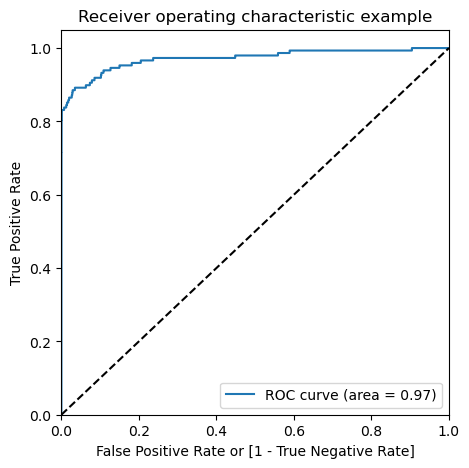

In [62]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very **good ROC** on the **test set** i.e. **0.97**

**Model summary** (***Logistic Regression***)

- **Train set**
  - Accuracy = 0.99
  - Sensitivity = 0.62
  - Specificity = 0.99
  - F1-Score = 0.73
  - ROC = 0.99

- **Test set**
  - Accuracy = 0.99
  - Sensitivity = 0.59
  - Specificity = 0.99
  - F1-Score = 0.70
  - ROC = 0.97


- The model is operating successfully in the test set overall.

# **XGBoost**

In [63]:
# Importing XGBoost
#import sys
#python3 -m pip install xgboost
from xgboost import XGBClassifier

**Hyperparameter Tuning**

In [64]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
               'subsample': [0.3, 0.6, 0.9]}
# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)
# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.049056,0.100863,0.133226,0.009219,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968849,0.980627,0.972742,0.974073,0.004900,5,0.999902,0.999885,0.999902,0.999896,0.000008
1,4.070224,0.180492,0.125522,0.000184,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.972602,0.981552,0.983711,0.979289,0.004809,1,0.999964,0.999984,0.999990,0.999979,0.000011
2,3.775479,0.282388,0.125538,0.012898,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.972958,0.984406,0.979955,0.979106,0.004712,2,0.999955,0.999969,0.999979,0.999968,0.000010
3,3.955274,0.376456,0.141458,0.012399,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.962868,0.968037,0.973444,0.968116,0.004318,6,0.999990,1.000000,0.999999,0.999997,0.000004
4,4.075327,0.127780,0.131494,0.018433,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969425,0.982261,0.980061,0.977249,0.005605,3,1.000000,1.000000,1.000000,1.000000,0.000000
5,3.889568,0.299399,0.131608,0.006770,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.968497,0.979108,0.978425,0.975343,0.004849,4,1.000000,1.000000,1.000000,1.000000,0.000000


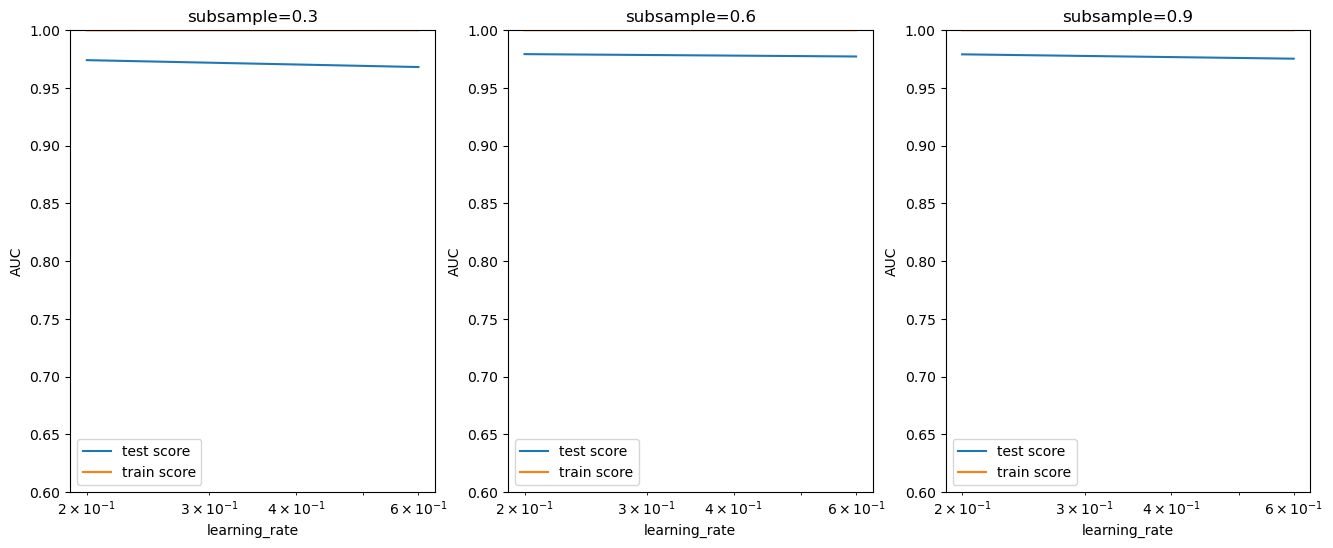

In [66]:
# Plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # Subplot
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

In [67]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [68]:
# chosen hyperparameters
# To calculate auc, we need an objective':'binary:logistic' that outputs probability rather than label.
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}
# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

**Prediction on the Train set**

In [69]:
# prediction on train set
y_train_pred = xgb_imb_model.predict(X_train)

In [70]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[199020      0]
 [     0    344]]


In [71]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [72]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [73]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [74]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [75]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

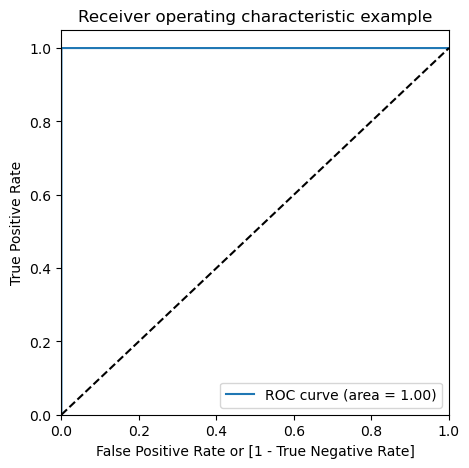

In [76]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

**Prediction on the Test set**

In [77]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [78]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85287     8]
 [   36   112]]


In [79]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [80]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9994850368081645
Sensitivity:- 0.7567567567567568
Specificity:- 0.9999062078668152
F1-Score:- 0.835820895522388


In [81]:
# Classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [82]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [83]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9685325016675037

**ROC of Test set**

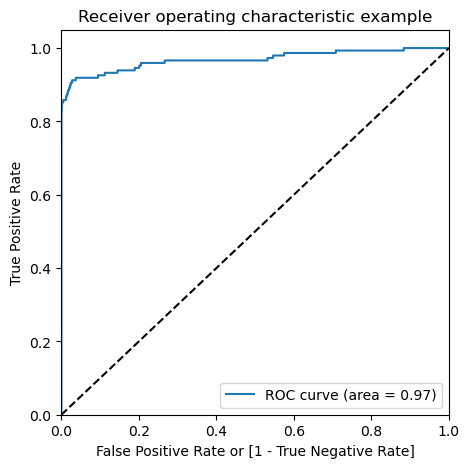

In [84]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary (xGBoost)**

- **Train set**

  - Accuracy = 0.99
  - Sensitivity = 0.62
  - Specificity = 0.99
  - F1-Score = 0.99
  - ROC_AUC = 0.99

- **Test set**

  - Accuracy = 0.99
  - Sensitivity = 0.76
  - Specificity = 0.99
  - F1-Score = 0.84
  - ROC_AUC = 0.97

- The model appears to be performing well on the test set as well.

# **Decision Tree**

In [85]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [86]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [87]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.240440,0.461469,0.047385,0.000136,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.930088,0.945270,0.927363,0.934240,0.007878,6
1,8.156782,0.553351,0.047500,0.012227,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.930088,0.945270,0.936126,0.937161,0.006241,4
2,8.315983,0.502828,0.057720,0.007326,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.938053,0.941089,0.935985,0.938376,0.002096,3
3,7.931086,0.414022,0.067105,0.008170,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.938053,0.936648,0.935985,0.936895,0.000862,5
4,14.443440,2.348347,0.045875,0.012980,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.961023,0.968059,0.889130,0.939404,0.035665,1
5,12.460627,0.714229,0.042676,0.008167,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.961017,0.968059,0.889119,0.939398,0.035669,2
6,12.714354,0.053801,0.047540,0.000534,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.934625,0.962133,0.889032,0.928597,0.030146,8
7,12.728246,0.648894,0.044299,0.004217,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.926023,0.962120,0.906035,0.931392,0.023209,7


In [88]:
grid_search.best_score_

0.9394041840487496

In [89]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [90]:
# Optimal Hyperparameters model
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

**Prediction on the Train set**

In [91]:
# Predictions on the Train set
y_train_pred = dt_imb_model.predict(X_train)

In [92]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198982     38]
 [   118    226]]


In [93]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [94]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992175116871652
Sensitivity:- 0.6569767441860465
Specificity:- 0.9998090644156367
F1-Score:- 0.743421052631579


In [95]:
# Classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.86      0.66      0.74       344

    accuracy                           1.00    199364
   macro avg       0.93      0.83      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [96]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [97]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9642430686526772

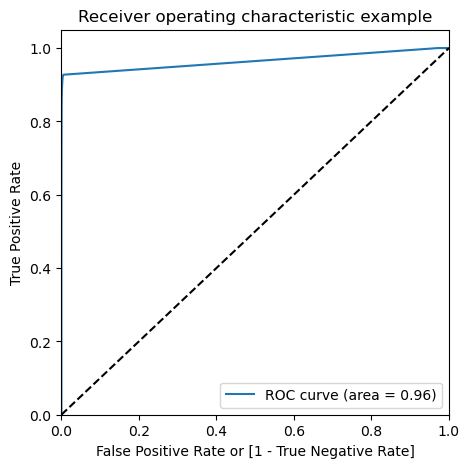

In [98]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Prediction on the Test set**

In [99]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [100]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85272    23]
 [   58    90]]


In [101]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [102]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990519995786665
Sensitivity:- 0.6081081081081081
Specificity:- 0.9997303476170936
F1-Score:- 0.743421052631579


In [103]:
# Classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.61      0.69       148

    accuracy                           1.00     85443
   macro avg       0.90      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [104]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [105]:
# ROC_AUC
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9205109690850355

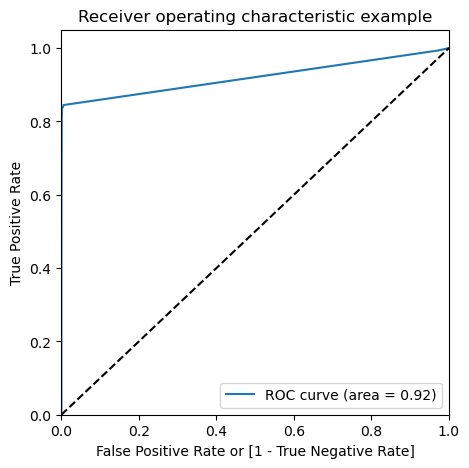

In [106]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**(***Decision Tree***)

- **Train set**
  - Accuracy = 0.99
  - Sensitivity = 0.65
  - Specificity = 0.99
  - F1-Score = 0.74
  - ROC-AUC = 0.96

- **Test set**
  - Accuracy = 0.99
  - Sensitivity = 0.61
  - Specificity = 0.99
  - F1 Score = 0.74
  - ROC-AUC = 0.92

**Random forest**

In [107]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [108]:
param_grid = {
    'max_depth': range(5,10,5) ,
    'min_samples_leaf': [50, 100],
    'min_samples_split': [50, 100],
    'n_estimators': [100,200], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=1)

In [109]:
grid_search.best_score_

0.9992124957364419

In [110]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 200}

In [111]:
# Model with best Hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                                        max_depth = 5,
                                        max_features = 10,
                                        min_samples_leaf = 50,
                                        min_samples_split = 100,
                                        n_estimators = 200)

In [112]:
# Fitting the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

**Prediction on the Train set**

In [113]:
# predictions on train test
y_train_pred = rfc_imb_model.predict(X_train)

In [114]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198984     36]
 [    89    255]]


In [115]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [116]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993730061595875
Sensitivity:- 0.7412790697674418
Specificity:- 0.9998191136569189
F1-Score:- 0.8031496062992126


In [117]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.88      0.74      0.80       344

    accuracy                           1.00    199364
   macro avg       0.94      0.87      0.90    199364
weighted avg       1.00      1.00      1.00    199364



In [118]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [119]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9843387540810437

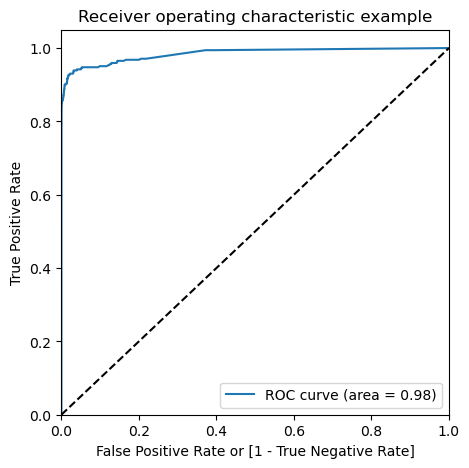

In [120]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Prediction on the test set**

In [121]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [122]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85273    22]
 [   49    99]]


In [123]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [124]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.99916903666772
Sensitivity:- 0.668918918918919
Specificity:- 0.9997420716337417
F1-Score:- 0.8031496062992126


In [125]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.67      0.74       148

    accuracy                           1.00     85443
   macro avg       0.91      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [126]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [127]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671830911162056

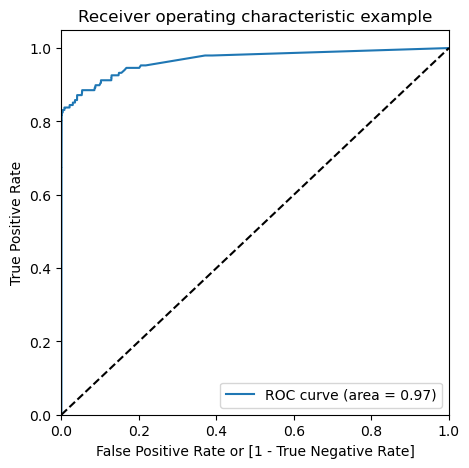

In [128]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** (***Random Forest***)

- **Train set**
  - Accuracy = 0.99
  - Sensitivity = 0.74
  - Specificity = 0.99
  - F1-Score = 0.80
  - ROC-AUC = 0.98
- **Test set**
  - Accuracy = 0.99
  - Sensitivity = 0.67
  - Specificity = 0.99
  - F1 Score = 0.80
  - ROC-AUC = 0.97

# **Selecting the best model on the skewed data**

- It is clear that almost all of the models we tested—Logistic, XGBoost, Decision Tree, and Random Forest—performed admirably.
- In terms of **ROC-AUC score**, **Logistic regression** and **XGBoost** fared well.
- The best option is **XGBoost**, which gives us a **ROC** score of **1.0** on the **train data** and **0.97** on the **test data**, assuming we were to choose one of them.

**For the best model, print the FPR, TPR, and optimal threshold from the roc curve**

In [129]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)

threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.81545657


- As we can see, the threshold is at a value of **0.81**, for which the TPR is highest and FPR is lowest, and for which we obtained the best ROC score.

# **Handling Class imbalance**
- We will test a number of methods for controlling data imbalance as we can see that it is severely out of balance.

**Resampling Methods**:

- Undersampling: Reduce instances of the majority class at random to the same number as the minority class.
- Oversampling: Generate artificial instances of the minority class or duplicate real ones to match the size of the majority class.
- SMOTE (Synthetic Minority Over-sampling Technique): Interpolate between nearby examples to produce synthetic minority class instances.
- ADASYN (Adaptive Synthetic Sampling): Create synthetic cases in areas where it is challenging to learn the minority class.

**Why Industry Doesn't Prefer Undersampling**?
- Undersampling is not always a good idea because it shrinks the size of the majority class, which could result in the loss of crucial data and poorer performance on the majority class. 
- Undersampling may also exclude potentially important data from the majority class, resulting in a partial knowledge of the issue.
- If the dataset is already tiny, undersampling can further reduce its size, which can result in the model being overfitted and performing poorly when applied to new datasets.

**SMOTE** **(Synthetic Minority Oversampling Technique)**

In [130]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [131]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting the SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [132]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (199364, 29)
After SMOTE oversampling X_train shape= (398040, 29)


**We will start Model building after balancing the data with SMOTE**

# **Logistic Regression** (by SMOTE)

In [133]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [134]:
# Results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.870864,0.039380,0.030014,0.007255,0.01,{'C': 0.01},0.992176,0.992258,0.991855,0.992450,0.992295,0.992207,0.000197,6,0.992239,0.992209,0.992294,0.992124,0.992203,0.992214,0.000055
1,0.927606,0.057624,0.030025,0.003116,0.1,{'C': 0.1},0.992294,0.992371,0.991976,0.992564,0.992401,0.992321,0.000194,5,0.992353,0.992325,0.992408,0.992241,0.992319,0.992329,0.000054
2,0.979626,0.074894,0.026509,0.006795,1,{'C': 1},0.992308,0.992384,0.991988,0.992578,0.992413,0.992334,0.000194,4,0.992365,0.992338,0.992420,0.992254,0.992332,0.992342,0.000054
3,0.935477,0.071817,0.029255,0.003351,10,{'C': 10},0.992309,0.992385,0.991990,0.992579,0.992414,0.992336,0.000194,3,0.992367,0.992339,0.992421,0.992255,0.992333,0.992343,0.000054
4,0.959589,0.070385,0.025635,0.006951,100,{'C': 100},0.992309,0.992385,0.991990,0.992579,0.992414,0.992336,0.000194,1,0.992367,0.992339,0.992422,0.992256,0.992333,0.992343,0.000054
5,0.908066,0.034775,0.026177,0.009183,1000,{'C': 1000},0.992309,0.992385,0.991990,0.992579,0.992414,0.992336,0.000194,2,0.992367,0.992339,0.992422,0.992255,0.992333,0.992343,0.000054


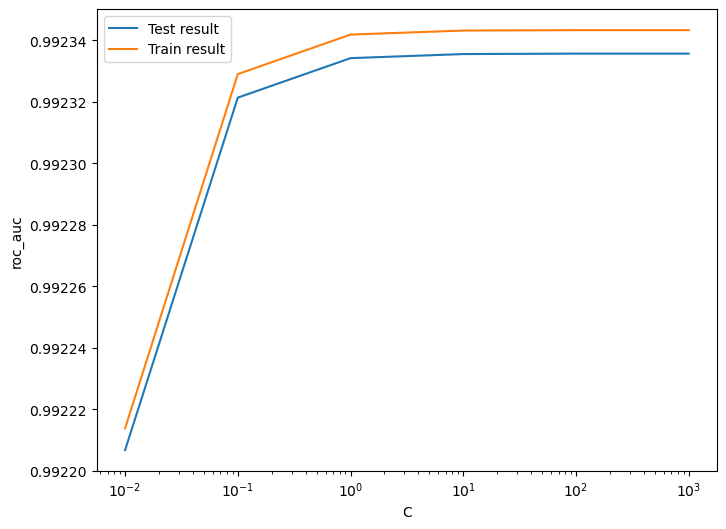

In [135]:
# plot of C versus Train and vVlidation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['Test result', 'Train result'], loc='best')
plt.xscale('log')

In [136]:
print(model_cv.best_score_)
print(model_cv.best_params_['C'])

0.9923356674461484
100


In [137]:
# Instantiating the model with best C
logistic_bal_smote = LogisticRegression(C=100)

In [138]:
# Fitting the model on the Train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

**Prediction on the Train set**

In [139]:
# Predictions on the Train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [140]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[194232   4788]
 [ 12078 186942]]


In [141]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [142]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9576273741332529
Sensitivity:- 0.9393126318962919
Specificity:- 0.975942116370214


In [143]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.94      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040



In [144]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

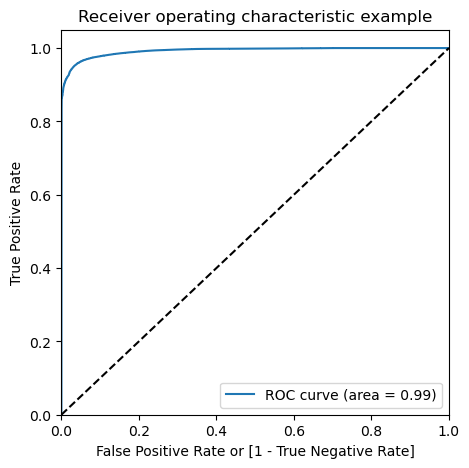

In [145]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

**Prediction on the test set**

In [146]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [147]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[83173  2122]
 [   18   130]]


In [148]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [149]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9749540629425465
Sensitivity:- 0.8783783783783784
Specificity:- 0.9751216366727241


In [150]:
# Classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443



**ROC on the test set**

In [151]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

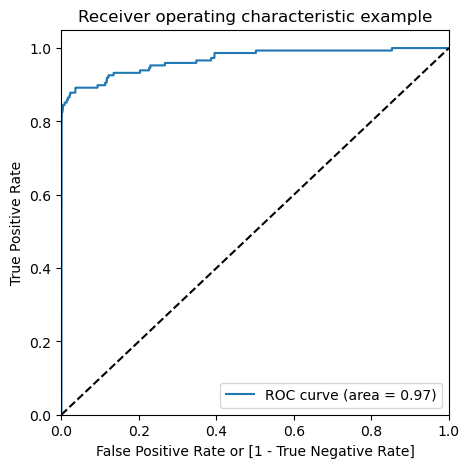

In [152]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(Logistic with SMOTE)**

**Train set**
- Accuracy = 0.96
- Sensitivity = 0.94
- Specificity = 0.98
- ROC = 0.99

**Test set**
- Accuracy = 0.97
- Sensitivity = 0.88
- Specificity = 0.97
- ROC = 0.97

# **XGBoost**(by SMOTE)

In [153]:
# Hyperparameter tuning with XGBoost
# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          
# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
# Fit the model
model_cv.fit(X_train_smote, y_train_smote)   

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [154]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.126005,0.080183,0.079904,0.002048,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999768,0.999742,0.999755,0.999755,0.000011,4,0.999776,0.999794,0.999785,0.999785,0.000008
1,2.157046,0.040559,0.075533,0.005944,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999756,0.999724,0.999749,0.999743,0.000014,5,0.999770,0.999775,0.999769,0.999771,0.000003
2,2.270358,0.100937,0.078608,0.003134,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999729,0.999703,0.999742,0.999724,0.000016,6,0.999744,0.999775,0.999764,0.999761,0.000013
3,2.116600,0.036907,0.072208,0.006870,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999971,0.999936,0.999959,0.999955,0.000015,1,0.999983,0.999985,0.999979,0.999982,0.000003
4,2.585456,0.385089,0.087305,0.005785,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999968,0.999933,0.999964,0.999955,0.000016,2,0.999982,0.999990,0.999983,0.999985,0.000004
5,2.550536,0.188852,0.087879,0.007686,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999961,0.999945,0.999958,0.999955,0.000007,3,0.999983,0.999984,0.999988,0.999985,0.000002


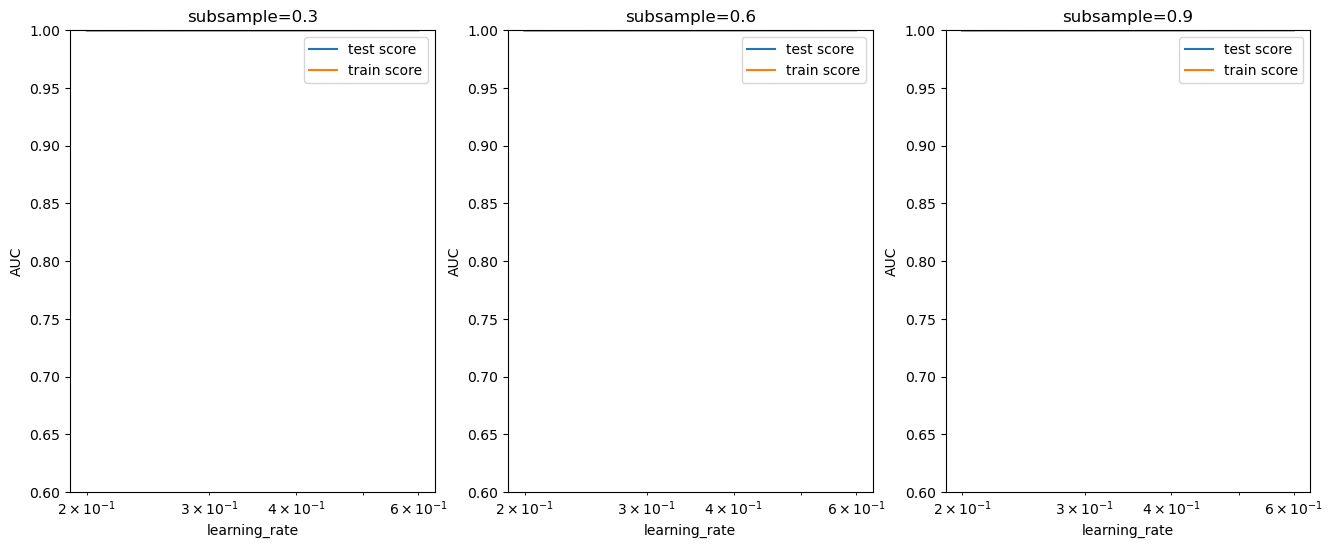

In [155]:
# Plotting
plt.figure(figsize=(16,6))
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 
for n, subsample in enumerate(param_grid['subsample']):
    

    # Subplot
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log')

We see that the Train score almost touches to 1

In [156]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [157]:
# chosen hyperparameters
# The output of "objective":"binary:logistic" is probability rather than label, which is what we require to calculate auc.
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

**Prediction on the train set**

In [158]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [159]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[199020      0]
 [     0 199020]]


In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [162]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [163]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [164]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

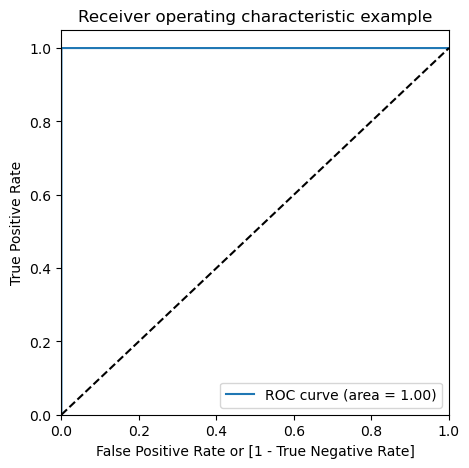

In [165]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the test set**

In [166]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [167]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85255    40]
 [   28   120]]


In [168]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999204147794436
Sensitivity:- 0.8108108108108109
Specificity:- 0.9995310393340758


In [170]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.81      0.78       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [171]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [172]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9755831510037503

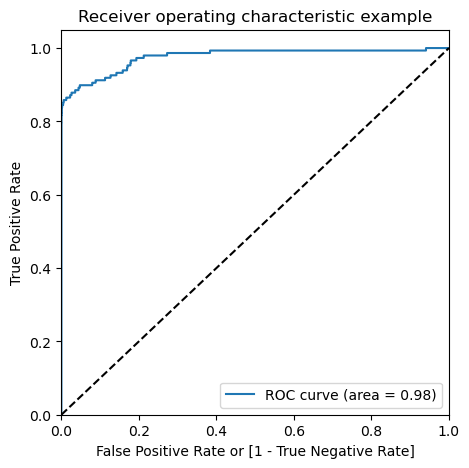

In [173]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(xGBoost)**

**Train set**
- Accuracy = 1.0
- Sensitivity = 1.0
- Specificity = 1.0
- ROC-AUC = 1.0

**Test set**
- Accuracy = 0.99
- Sensitivity = 0.81
- Specificity = 0.99
- ROC-AUC = 0.98

# **Decision Tree** (by SMOTE)

In [174]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [175]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.251969,0.076838,0.040153,0.012592,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.991320,0.990893,0.991279,0.991164,0.000193,7
1,5.125164,0.044775,0.036678,0.007226,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.991320,0.990866,0.991292,0.991160,0.000208,8
2,5.208176,0.152127,0.036675,0.007628,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.991431,0.990942,0.991322,0.991232,0.000210,6
3,5.408450,0.222004,0.036499,0.007405,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.991431,0.990942,0.991327,0.991233,0.000210,5
4,9.335031,0.126210,0.038056,0.005330,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998450,0.998420,0.998653,0.998508,0.000104,1
5,9.622396,0.060525,0.039540,0.006156,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998459,0.998358,0.998645,0.998487,0.000119,2
6,9.358051,0.172052,0.031299,0.000034,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998417,0.998489,0.998498,0.998468,0.000036,3
7,9.299866,0.143436,0.038269,0.006599,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998412,0.998477,0.998471,0.998454,0.000029,4


In [176]:
grid_search.best_score_

0.9985077734077565

In [177]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

In [178]:
# Model with optimal Hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

**Prediction on the Train set**

In [179]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [180]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[195552   3468]
 [  1610 197410]]


In [181]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [182]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9872424881921414
Sensitivity:- 0.9919103607677621
Specificity:- 0.9825746156165209


In [183]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    199020
           1       0.98      0.99      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



In [184]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [185]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9990155657304249

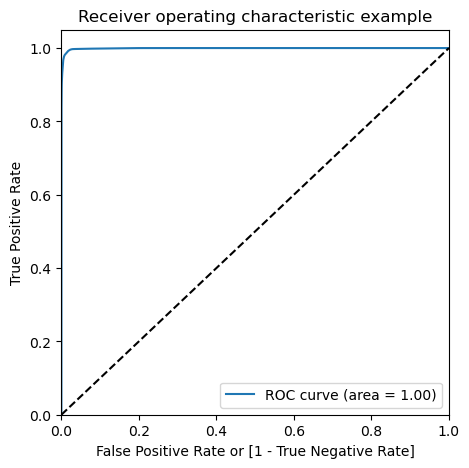

In [186]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

**Prediction on the Test set**

In [187]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [188]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[83761  1534]
 [   29   119]]


In [189]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [190]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9817071029809347
Sensitivity:- 0.8040540540540541
Specificity:- 0.982015358461809


In [191]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.80      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.89      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [192]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [193]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9001736818006821

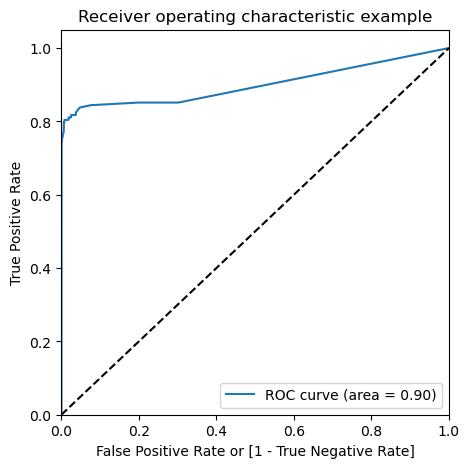

In [194]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(Decision Tree)**

**Train set**
- Accuracy = 0.99
- Sensitivity = 0.99
- Specificity = 0.98
- ROC-AUC = 1.0

**Test set**
- Accuracy = 0.98
- Sensitivity = 0.80
- Specificity = 0.98
- ROC-AUC = 0.90

## **AdaSyn (Adaptive Synthetic Sampling)**

In [195]:
# AdaSyn
from imblearn.over_sampling import ADASYN

In [196]:
# Instantiate AdaSyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [197]:
from collections import Counter
# Before sampling class distribution
print('Before sampling class distribution:', Counter(y_train))
# New class distribution
print('New class distribution:', Counter(y_train_adasyn))

Before sampling class distribution: Counter({0: 199020, 1: 344})
New class distribution: Counter({1: 199035, 0: 199020})


# **Logistic Regression** (with Adasyn)

In [198]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [199]:
# Results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.744975,0.054473,0.052149,0.007471,0.01,{'C': 0.01},0.971577,0.971037,0.971380,0.971331,0.000223,6,0.971371,0.971379,0.971332,0.971361,0.000021
1,0.821885,0.032201,0.041754,0.007432,0.1,{'C': 0.1},0.971852,0.971298,0.971661,0.971604,0.000230,5,0.971632,0.971645,0.971630,0.971635,0.000007
2,0.779660,0.014595,0.047192,0.000241,1,{'C': 1},0.971872,0.971319,0.971687,0.971626,0.000230,4,0.971652,0.971665,0.971657,0.971658,0.000006
3,0.805022,0.006333,0.047001,0.000181,10,{'C': 10},0.971874,0.971322,0.971689,0.971628,0.000230,3,0.971653,0.971667,0.971660,0.971660,0.000006
4,0.802138,0.032589,0.042788,0.007723,100,{'C': 100},0.971874,0.971322,0.971690,0.971628,0.000230,2,0.971653,0.971667,0.971660,0.971660,0.000006
5,0.780879,0.008646,0.043921,0.009159,1000,{'C': 1000},0.971874,0.971322,0.971690,0.971628,0.000230,1,0.971653,0.971668,0.971660,0.971660,0.000006


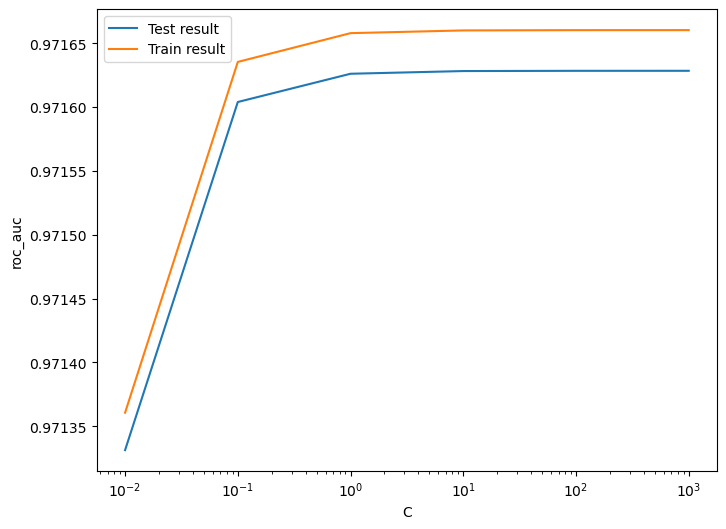

In [200]:
# plot of C versus Train and Validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log')

In [201]:
print(model_cv.best_score_)
print(model_cv.best_params_)

0.9716284002658243
{'C': 1000}


**Logistic Regression with optimal C**

In [202]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [203]:
# Fitting the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

**Prediction on the Train set**

In [204]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [205]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[183427  15593]
 [ 20932 178103]]


In [206]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [207]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))
# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.9082413234352037
Sensitivity:- 0.8948325671364333
Specificity:- 0.9216510903426791
F1-Score:- 0.9069974104412435


In [208]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91    199020
           1       0.92      0.89      0.91    199035

    accuracy                           0.91    398055
   macro avg       0.91      0.91      0.91    398055
weighted avg       0.91      0.91      0.91    398055



In [209]:
 # Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [210]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9716572242372835

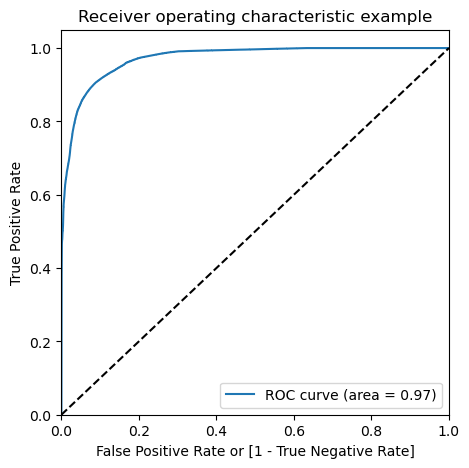

In [211]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the Test set**

In [212]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [213]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[78517  6778]
 [   15   133]]


In [214]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [215]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9204967054059432
Sensitivity:- 0.8986486486486487
Specificity:- 0.9205346151591536


In [216]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.90      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.96     85443



In [217]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [218]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.96877803267832

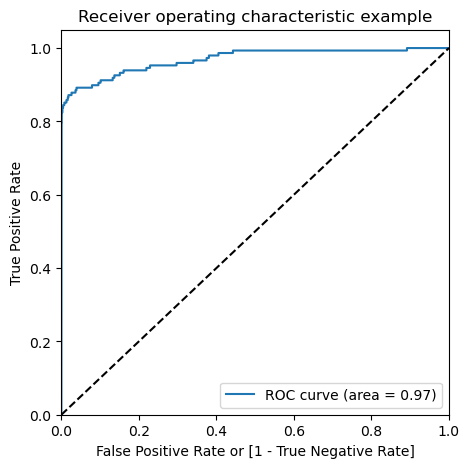

In [219]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(Logistic Regression with Adasyn)**

**Train set**
- Accuracy = 0.91
- Sensitivity = 0.89
- Specificity = 0.92
- ROC = 0.97

**Test set**
- Accuracy = 0.92
- Sensitivity = 0.90
- Specificity = 0.92
- ROC = 0.97

# **XGBoost (with Adasyn)**

In [220]:
# Hyperparameter tuning with XGBoost
# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          
# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [221]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.898124,0.011376,0.080082,0.002507,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.993069,0.973895,0.982416,0.983126,0.007844,6,0.999345,0.999395,0.999451,0.999397,0.000044
1,1.898588,0.000140,0.083710,0.007367,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.992996,0.978796,0.983006,0.984933,0.005955,3,0.999376,0.999457,0.999469,0.999434,0.000041
2,2.103092,0.108958,0.084287,0.008444,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.991209,0.979109,0.982608,0.984309,0.005084,5,0.999230,0.999392,0.999476,0.999366,0.000102
3,1.919776,0.009297,0.078377,0.013011,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.993245,0.983393,0.986213,0.987617,0.004143,1,0.999956,0.999964,0.999961,0.999960,0.000003
4,2.145402,0.169853,0.083583,0.007608,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.988765,0.981977,0.983889,0.984877,0.002858,4,0.999955,0.999967,0.999968,0.999963,0.000006
5,2.097930,0.166457,0.083715,0.007373,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.991954,0.977904,0.989933,0.986597,0.006202,2,0.999961,0.999968,0.999975,0.999968,0.000006


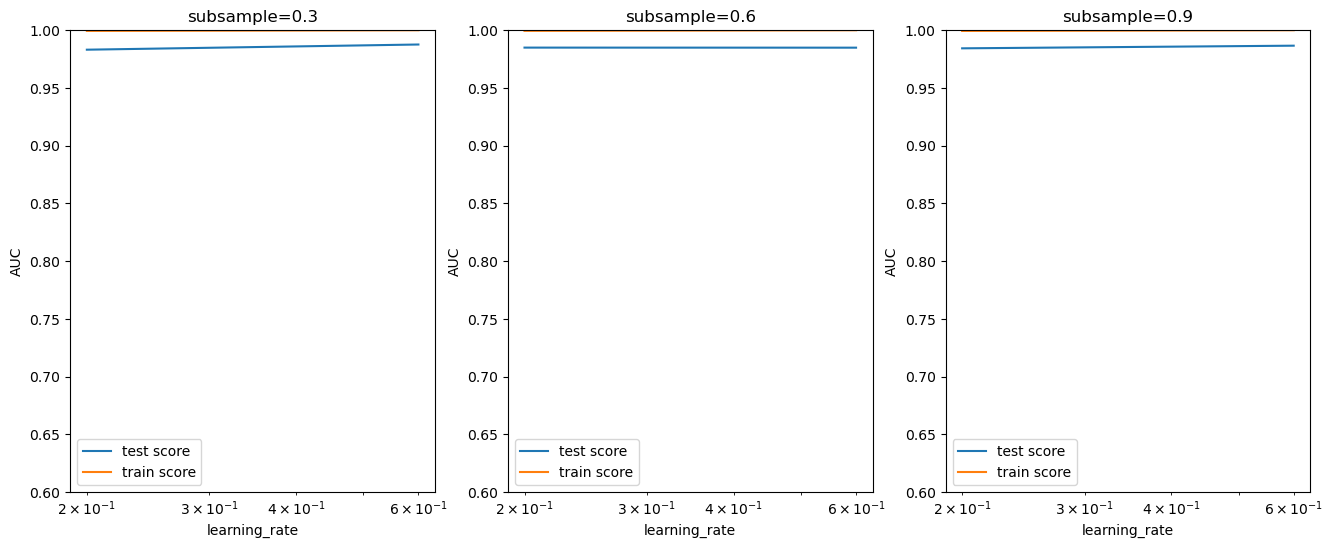

In [222]:
# Plotting
plt.figure(figsize=(16,6))
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 
for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='best')
    plt.xscale('log') 

In [223]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [224]:
# chosen Hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# Fitting model on Training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

**Prediction on the Train set**

In [225]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [226]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[199020      0]
 [     0 199035]]


In [227]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [228]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [229]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199035

    accuracy                           1.00    398055
   macro avg       1.00      1.00      1.00    398055
weighted avg       1.00      1.00      1.00    398055



In [230]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [231]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

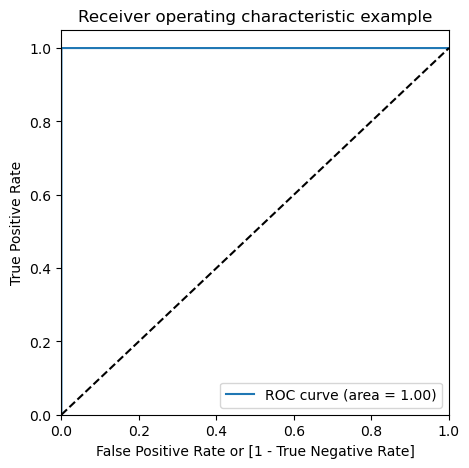

In [232]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the Test set**

In [233]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [234]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[85253    42]
 [   28   120]]


In [235]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [236]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9991807403766253
Sensitivity:- 0.8108108108108109
Specificity:- 0.9995075913007796


In [237]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.81      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [238]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [239]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9701725173206504

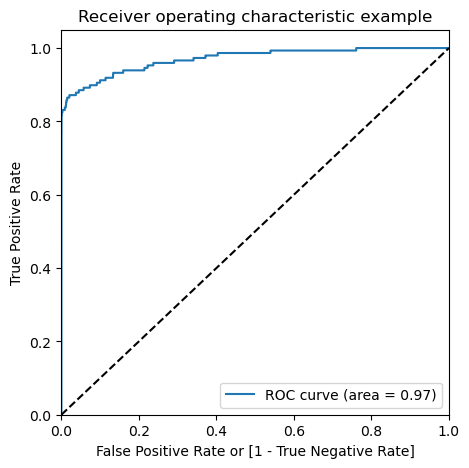

In [240]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(xGBoost with Adasyn)**

**Train set**
- Accuracy = 1
- Sensitivity = 1
- Specificity = 1
- ROC-AUC = 1

**Test set**
- Accuracy = 0.99
- Sensitivity = 0.81
- Specificity = 0.99
- ROC-AUC = 0.97

# **Decision Tree**

In [241]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [242]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.295846,0.209025,0.036525,0.007390,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933534,0.926700,0.932391,0.930875,0.002989,6
1,5.156161,0.091720,0.035756,0.008692,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933534,0.926694,0.932397,0.930875,0.002993,5
2,5.111481,0.123294,0.029394,0.003021,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.935424,0.923102,0.932388,0.930305,0.005242,8
3,5.166053,0.097806,0.036742,0.007608,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.937300,0.922762,0.932387,0.930816,0.006038,7
4,8.589773,0.355374,0.036512,0.007331,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.923964,0.948945,0.924509,0.932473,0.011650,3
5,8.568701,0.423946,0.041795,0.007457,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.925024,0.948908,0.921456,0.931796,0.012187,4
6,8.463770,0.384524,0.031383,0.000187,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932466,0.946908,0.928131,0.935835,0.008027,2
7,8.732365,0.192728,0.032286,0.001485,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932016,0.949269,0.927427,0.936237,0.009403,1


In [243]:
grid_search.best_score_

0.9362369644341909

In [244]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)

In [245]:
# Model with Optimal Hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

**Prediction on the train set**

In [246]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [247]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[191468   7552]
 [  1262 197773]]


In [248]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [249]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9778573312733165
Sensitivity:- 0.9936594066370237
Specificity:- 0.9620540649180986


In [250]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    199020
           1       0.96      0.99      0.98    199035

    accuracy                           0.98    398055
   macro avg       0.98      0.98      0.98    398055
weighted avg       0.98      0.98      0.98    398055



In [251]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [252]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9930926085006726

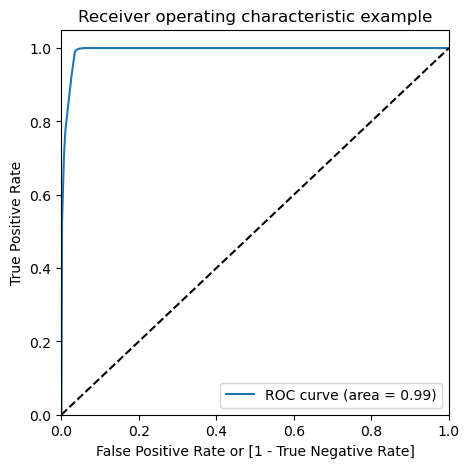

In [253]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Prediction on the Test set**

In [254]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [255]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[81971  3324]
 [   23   125]]


In [256]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [257]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9608276862937865
Sensitivity:- 0.8445945945945946
Specificity:- 0.9610293686617035


In [258]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.84      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.90      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [259]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [260]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9273597752157456

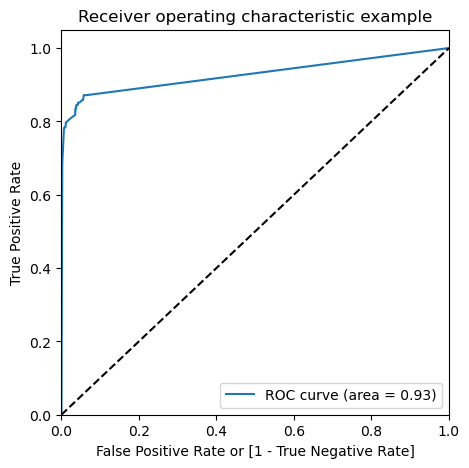

In [261]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary** **(Decision Tree with Adasyn)**

**Train set**
- Accuracy = 0.98
- Sensitivity = 0.99
- Specificity = 0.96
- ROC-AUC = 0.99

**Test set**
- Accuracy = 0.96
- Sensitivity = 0.84
- Specificity = 0.96
- ROC-AUC = 0.93

**Selecting the Optimal model based on Balanced data**
- Here, SMOTE and Adasyn, two of our top methods, were used to balance the data. We created a number of models using each data balancing technique, including **Logistic**, **XGBoost**, **Decision Tree**, and **Random Forest**. 
- Both Adasyn and SMOTE models functioned admirably. The simplest of these models, logistic regression, has a ROC score of 0.99 on the train set and 0.97 on the test set. 
- Because the models are simple to read and use less resources to develop than other heavy models like Random Forest or XGBoost, we can say that the Logistic model is the best one to utilize.
- As a result, we can say that the best model is the **Logistic regression model with SMOTE**.

**For the best model, print the FPR, TPR, and optimal threshold from the roc curve.**

In [262]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9923384005806928
Threshold= 0.4014855513339258


We can see that the **threshold** is **0.40**, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## **Cost-Benefit Analysis**
- Up till now, we have tested a number of models using both balanced and unbalanced data. In terms of ROC score, Precision, and Recall, the majority of the models appear to have fared rather well.
- However, there are a few factors to take into account while choosing the appropriate model, such as whether or not we have the necessary resources, infrastructure, or computing capacity to run the model.
- We need lots of computational resources for models like Random Forest, SVM, and XGBoost, and as we create the infrastructure, the cost of deploying the model rises. 
- The cost of creating the model is lower for simpler models like logistic regression since they demand fewer computational resources. For small change, we also need to take that into account.

# **Business summary** 
- We would need high precision for banks with lesser average transaction values because we only want to flag relevant transactions as fraudulent. 
- We may add the human element to every transaction that is reported as fraudulent, calling the customer to confirm that the transaction actually took place. Such jobs, however, become burdensome when accuracy is poor since the human component must be enhanced.
- If a model has low recall for banks with higher transaction values, it suggests that it is missing a significant percentage of real fraudulent transactions (False Negatives).
- As a result, we must take into account the losses if the transaction was a high-value fraudulent one.
- Therefore, in order to protect the banks against costly fraudulent transactions, we have